In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [53]:
df = pd.read_csv("movie_metadata.csv")
#visualiza as primeiras 5 entradas do dataframe (se quiser ver mais é só colocar um valor dentro dos parênteses)
df.head()



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [54]:
#imprime o número de linhas e colunas do dataframe
df.shape

(5043, 28)

In [55]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [56]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [57]:
#descartando a coluna com o link do IMDB do filme
df.drop('movie_imdb_link', axis=1, inplace=True)

In [58]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [59]:
df.drop('color', axis=1, inplace=True)

In [60]:
#verificando se existem valores faltantes nos dados
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [61]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [62]:
#descartando as linhas que tem poucos valores faltantes
df.dropna(axis=0, subset=['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'],inplace=True)
#nao vamos tirar as linhas na coluna gross,content_rating,budget ecc.. porque tem muitos dados faltantes

In [63]:
df.isna().sum()


director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        644
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                  0
num_user_for_reviews           0
language                       0
country                        0
content_rating               169
budget                       352
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 209
movie_facebook_likes           0
dtype: int64

In [64]:
#verificando quais os valores na coluna 'content rating' (classificação indicativa)
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [65]:
#substituindo os valores faltantes por 'R' 
#porque R e o mais comum na coluna entao vamos supor que o valores faltantes sao do tipo R
df['content_rating'].fillna('R', inplace=True)

In [66]:
#verificando quais os valores na coluna 'aspect ratio' (proporção de tela)
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
2.76        3
2.40        3
1.75        3
1.50        2
2.55        2
1.77        1
1.18        1
2.24        1
1.44        1
1.20        1
Name: aspect_ratio, dtype: int64

In [67]:
#substituindo os valores faltantes pela mediana dos valores
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [68]:
df['budget'].value_counts()

20000000.0    172
30000000.0    141
25000000.0    140
15000000.0    140
40000000.0    130
             ... 
10818775.0      1
13800000.0      1
12305523.0      1
12600000.0      1
1100.0          1
Name: budget, Length: 424, dtype: int64

In [69]:
#substituindo os valores faltantes pela mediana dos valores
df['budget'].fillna(df['budget'].median(), inplace=True)

In [70]:
#substituindo os valores faltantes pela mediana dos valores
df['gross'].fillna(df['gross'].median(), inplace=True)


In [71]:
#verificando se removemos (ou substituimos) todos os valores faltantes
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [72]:
#verificando se temos valores duplicados
df.duplicated().sum()

42

In [73]:
#removendo as duplicatas
df.drop_duplicates(inplace=True)

In [74]:
df.shape



(4695, 26)

In [75]:
df['language'].value_counts()


English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

In [76]:
#descartando a coluna 'language'
df.drop('language', axis=1, inplace=True)

In [77]:
#verificando os valores na coluna 'country'
df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New Line   

In [78]:
#descartando a coluna 'country'
df.drop('country', axis=1, inplace=True)


In [79]:
#criando uma nova coluna na tabela
df['Profit'] = df['budget'].sub(df['gross'], axis=0)

In [80]:
#verificando se a coluna foi criada corretamente
df.head()


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [81]:
#criando uma novla coluna na tabela
df['Profit_Percentage'] = (df['Profit']/df['gross'])*100

In [82]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


In [83]:
#salvando os dados do dataframe em um arquivo csv
df.to_csv('dados_imdb_analiseexpl.csv', index=False)

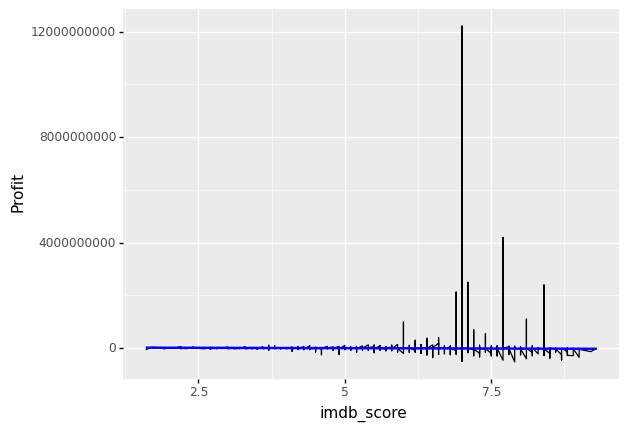

<ggplot: (305233149)>

In [84]:
#criando gráfico de correlaciona lucro e nota do IMDB
ggplot(aes(x='imdb_score', y='Profit'), data=df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

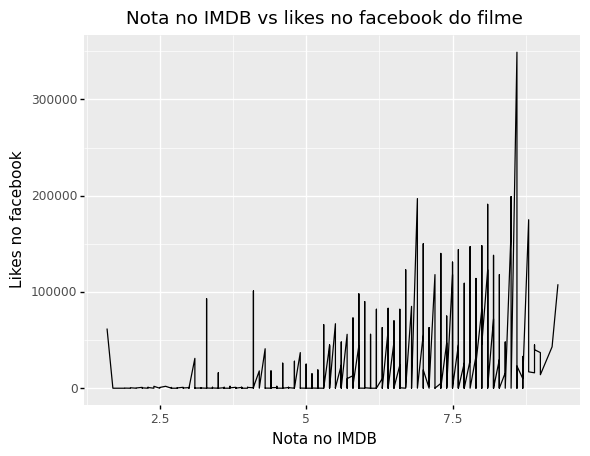

<ggplot: (312673332)>

In [85]:
#criando gráfico de correlaciona likes no facebook do filme e nota do IMDB

(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota no IMDB vs likes no facebook do filme', x='Nota no IMDB', y='Likes no facebook')
)

/Users/paulo/opt/anaconda3/envs/programaria/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


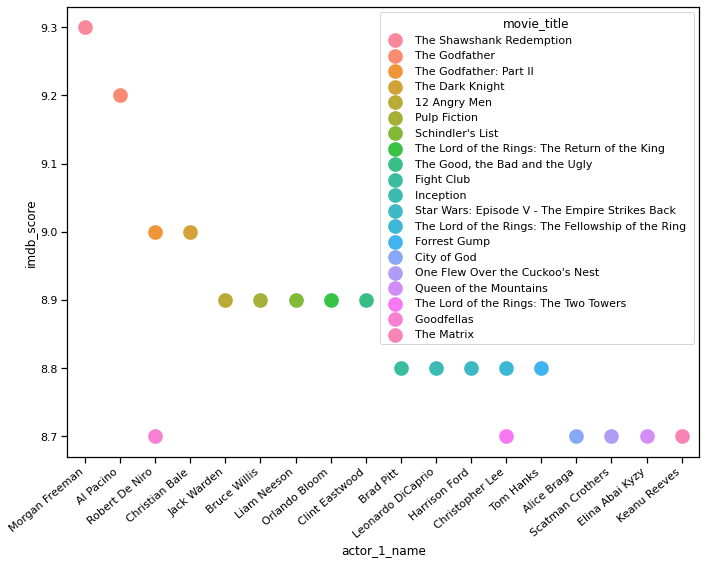

In [86]:
#gráfico dos 20 filmes com melhor nota com relação aos atores principais
plt.figure(figsize=(10,8))

df= df.sort_values(by ='imdb_score' , ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [87]:
#retirando algumas colunas com dados categóricos
df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 
                 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [88]:
#verificando os valores da coluna 'genre'
df['genres'].value_counts()


Drama                                       209
Comedy                                      186
Comedy|Drama|Romance                        182
Comedy|Drama                                180
Comedy|Romance                              149
                                           ... 
Biography|Crime|Drama|Mystery|Thriller        1
Comedy|Drama|Music|Musical|Romance            1
Biography|Comedy|Musical|Romance|Western      1
Crime|Drama|Fantasy|Romance                   1
Action|Animation|Comedy|Family|Fantasy        1
Name: genres, Length: 875, dtype: int64

In [89]:
#retirando a coluna 'genres'
df.drop('genres', axis=1, inplace=True)


In [90]:
#retirando as colunas criadas
df.drop(columns=['Profit', 'Profit_Percentage'], axis=1, inplace=True)

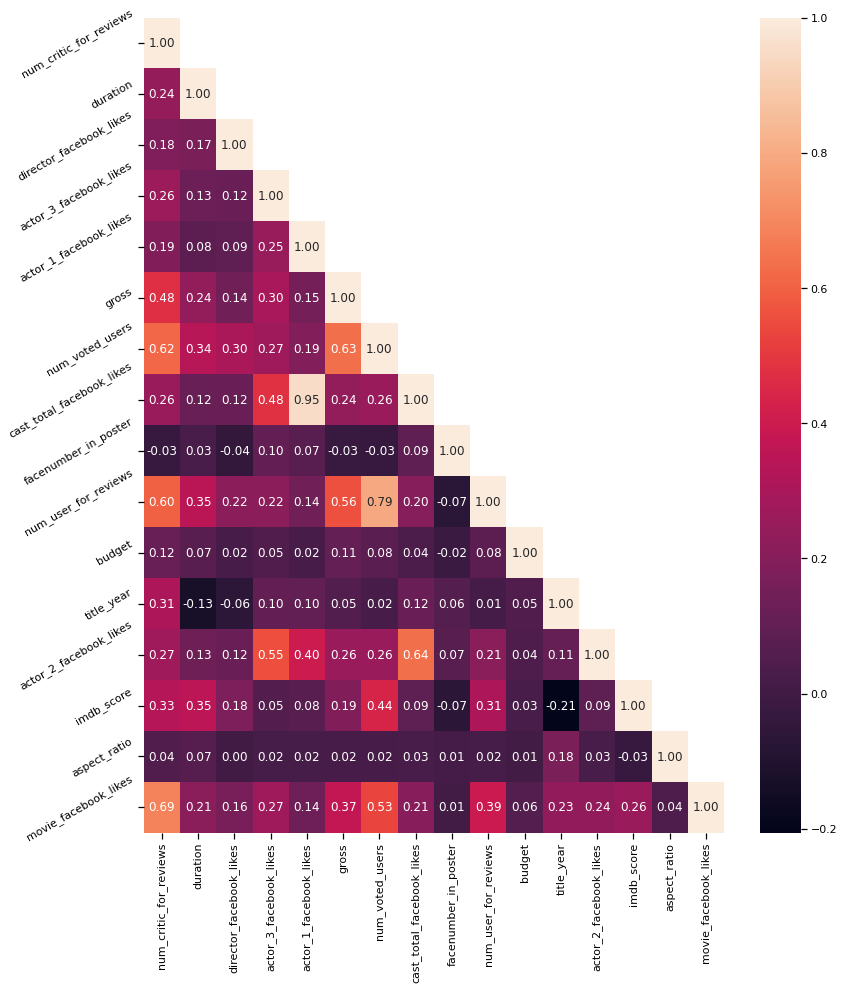

In [105]:
#verificando se existem colunas fortemente correlacionadas
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [106]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas
df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [107]:
#removendo as colunas
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'cast_total_facebook_likes'], axis=1, inplace=True)

In [108]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas

df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']


In [109]:
#removendo as colunas
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

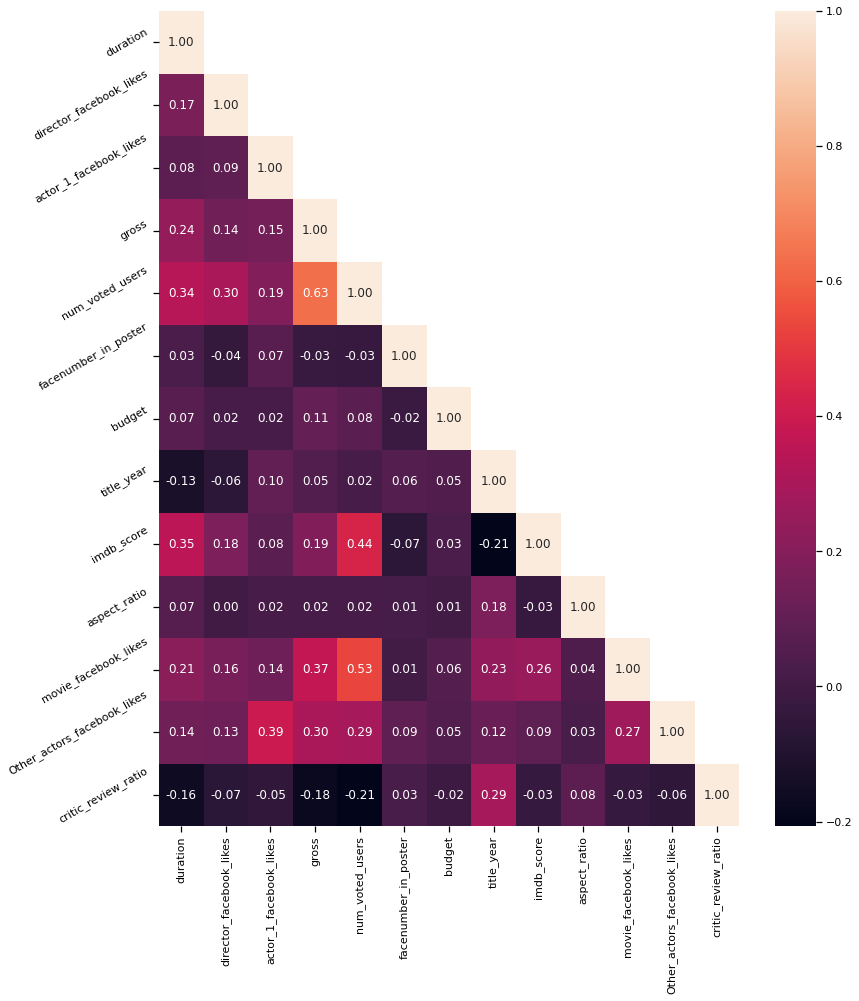

In [111]:
#verificando se ainda existem colunas fortemente correlacionadas

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [112]:
#categorizando os valores de nota do imdb
df['imdb_binned_score']=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [116]:
df.head(1000)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,115.0,44.0,23000.0,50003300.0,36624,4.0,PG,15000000.0,1994.0,7.3,1.85,0,4902.0,0.204545,3
2089,122.0,529.0,820.0,54235441.0,52894,3.0,PG,22000000.0,2014.0,7.3,2.35,55000,372.0,0.972973,3
3096,109.0,304.0,939.0,47536959.0,86956,0.0,R,10000000.0,2009.0,7.3,1.85,12000,1642.0,1.174545,3
3566,101.0,0.0,13000.0,4000304.0,145395,0.0,NC-17,6500000.0,2011.0,7.3,2.35,23000,1624.0,1.296000,3


In [117]:
#criando novas colunas para transformar os valores categóricos de 'content rating' (classificação indicativa)
#em valores numéricos
df = pd.get_dummies(data = df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [118]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [119]:
df.to_csv('dados_imdb_com_nota.csv', index=False)

In [120]:
#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross',
                        'num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio',
                        'movie_facebook_likes','Other_actors_facebook_likes','critic_review_ratio',
                        'content_rating_G','content_rating_GP',
                        'content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=df)

In [121]:
#escolhendo a(s) coluna(s) do dataframe que serão a resposta do modelo
y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

In [122]:
#importando o pacote de divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [123]:
#dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
#normalizando os dados porque estao miutos diferenteres entre eles
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [126]:
#importando, configurando e treinando o modelo de regressão 
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          108     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55536D+03    |proj g|=  1.28950D+03

At iterate   50    f=  2.11670D+03    |proj g|=  1.39935D+00

At iterate  100    f=  2.11667D+03    |proj g|=  4.76834D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  108    105    110      1     0     0   2.144D-02   2.117D+03
  F =   2116.6671378397828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [127]:
#verificando os valores preditos
y_pred

array([3, 3, 3, ..., 2, 3, 3])

In [128]:
#importando o pacote de métricas e calculando a matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)

In [129]:
#código para melhor visualização da matriz de confusão
#alternativa:
# print(cnf_matrix)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

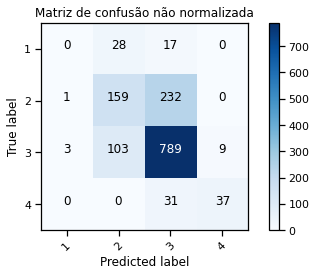

In [130]:
#imprimindo a matriz de confusão
plot_confusion_matrix(cnf_matrix, classes=['1','2', '3', '4'],
                      title='Matriz de confusão não normalizada', normalize=False)

In [131]:
#verificando quantos valores existem de cada categoria em 'imdb_binned_score'
df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [132]:
#métricas finais
print(metrics.classification_report(y_test, y_pred, target_names=['1','2', '3', '4']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.55      0.41      0.47       392
           3       0.74      0.87      0.80       904
           4       0.80      0.54      0.65        68

    accuracy                           0.70      1409
   macro avg       0.52      0.46      0.48      1409
weighted avg       0.66      0.70      0.67      1409



In [133]:
#importante o pacote para salvar o modelo
import pickle

In [134]:
#definindo em qual caminho vamos salvar o modelo
modelo_treinado = 'modelo_imdb.sav'

In [135]:
#salvando o modelo
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [136]:
#carregando o modelo treinado
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [137]:
#Olhando o conteúdo de um vetor de teste
X_test[0]

array([-0.11125319,  0.12234245, -0.47077098, -0.56684582,  0.102644  ,
       -0.18064455, -0.29363035,  0.56016395, -0.41895874,  0.10788607,
       -0.40176212,  0.17842293, -0.14967295, -0.04276995, -0.03491087,
       -0.04276995, -0.14093771, -0.41056461, -0.65997074, -0.03903749,
        1.05121875, -0.0302291 , -0.0302291 , -0.01744746, -0.11240473,
       -0.05240624])

In [138]:
#fazendo predição do novo dado com o modelo carregado
modelo_carregado.predict([X_test[0]])

array([3])